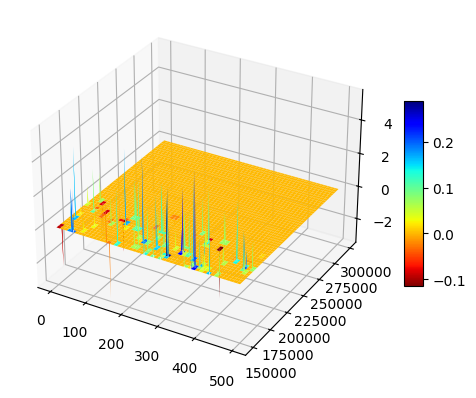

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM = 24083010048
np.random.seed(42)

makan = pd.read_csv("makanan.csv")
# mohon ditambahkan (lagi) agar lebih beragam

budget = 1e6  # rupiah

wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9  # simpangan lebih besar
wbosan_base = 0.2

skor_kumulatif = 0.0
SAMPLE_NUM = 500

sampleid = np.arange(0, SAMPLE_NUM)
# skor perorangan
skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)

for n in range(0, SAMPLE_NUM):
    budget = 1e6
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(0, 31):  # hari
        # makan pertama, pilih secara acak
        pilihan = np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif = skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] \
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan  # ✅ sudah dibetulkan (pakai i)

        # makan kedua
        pilihan = np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base + 0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base * 2, scale=0.2)
        skor_kumulatif = skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] \
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan  # ✅ sudah dibetulkan (pakai i)

    # simpan hasil akhir simulasi untuk sampel ini
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    # Aman dari indeks negatif / out of range
    idx = int((budget - SISA_MININUM) / 1000)
    if 0 <= idx < len(bin_sisa):
        resp_sehat[n][idx] = skor_sehat

# Visualisasi
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)
surf = ax.plot_surface(
    X, Y, resp_sehat,
    cmap='jet_r',
    edgecolor='none'
)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

# TUGAS
# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif
# (4) tampilkan jadwal makanan sesuai pilihan (resp_pilih)


### ChatGPT

1. Kode ini kenapa error? aku coba running kode dari dosenku tapi error. -> Kemungkinan besar error-nya muncul di bagian ini: resp_pilih = np.zeros((SAMPLE_NUM, 61), dtype=np.double). Berarti indeks yang diakses:
Hari ke-0 → indeks 0 dan 1
Hari ke-30 → indeks 60 dan 61
👉 Artinya kamu butuh 62 kolom (indeks 0–61).
Tapi kamu mendefinisikan hanya 61 kolom.
2. Ini kenapa error muncul ValueError: cannot convert float NaN to integer. -> Artinya variabel budget sedang bernilai NaN, jadi waktu dihitung (budget - SISA_MININUM) / 1000, hasilnya NaN, dan Python nggak bisa ubah itu jadi int.


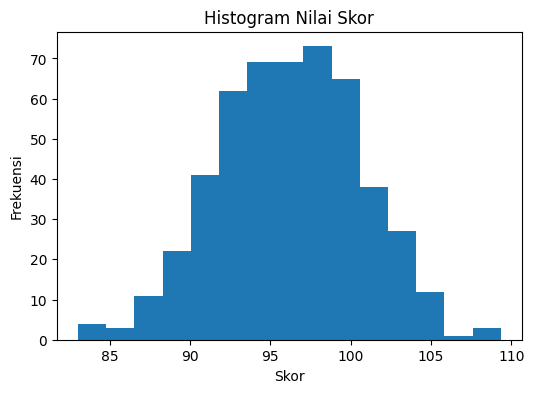

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(skor, bins=15)
plt.title("Histogram Nilai Skor")
plt.xlabel("Skor")
plt.ylabel("Frekuensi")
plt.show()

Kode di atas digunakan untuk menampilkan histogram dari skor. Dari visualisasi histogram dapat diketahui bahwa sebagian besar data terkonsentrasi di rentang 93--100. Frekuensi tertinggi terlihat pada skor di kisaran tengah tersebut, menandakan bahwa mayoritas sampel memiliki skor yang cukup tinggi dan relatif seragam. Pola histogram memberi gambaran bahwa distribusi skor cenderung normal

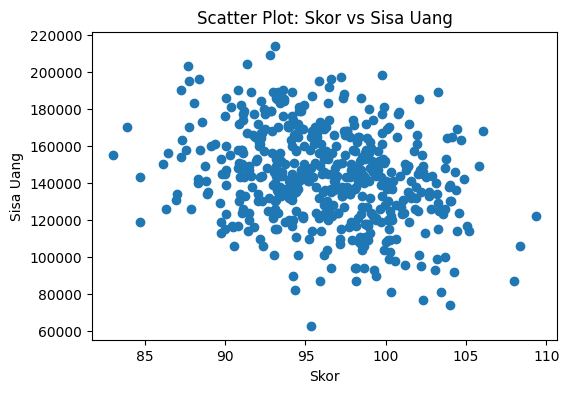

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(skor, sisa)
plt.title("Scatter Plot: Skor vs Sisa Uang")
plt.xlabel("Skor")
plt.ylabel("Sisa Uang")
plt.show()

Scatter plot antara skor dan sisa uang menunjukkan bahwa titik-titik data tersebar cukup acak tanpa pola tertentu. Artinya, tidak terlihat hubungan yang jelas antara tinggi-rendahnya skor dengan besar-kecilnya sisa uang. Individu dengan skor tinggi maupun rendah dapat memiliki sisa uang yang bervariasi, mulai dari yang sedikit hingga yang besar.

In [ ]:
# (1) indeks sampel yang punya skor kesehatan positif
indeks_sehat_positif = []

for n in range(SAMPLE_NUM):
    if np.any(resp_sehat[n] > 0):
        indeks_sehat_positif.append(n)

indeks_sehat_positif


[5,
 11,
 15,
 17,
 19,
 21,
 22,
 35,
 36,
 37,
 40,
 43,
 44,
 49,
 52,
 53,
 56,
 57,
 62,
 63,
 68,
 72,
 75,
 76,
 89,
 92,
 95,
 103,
 104,
 106,
 109,
 111,
 131,
 132,
 133,
 136,
 140,
 141,
 144,
 153,
 159,
 165,
 166,
 167,
 169,
 175,
 188,
 193,
 205,
 208,
 211,
 212,
 213,
 215,
 216,
 218,
 222,
 223,
 227,
 230,
 231,
 232,
 233,
 234,
 241,
 242,
 244,
 245,
 253,
 254,
 255,
 257,
 258,
 259,
 261,
 262,
 269,
 271,
 275,
 287,
 288,
 289,
 290,
 291,
 293,
 294,
 297,
 298,
 301,
 304,
 306,
 307,
 310,
 311,
 312,
 314,
 315,
 318,
 319,
 320,
 321,
 323,
 330,
 333,
 335,
 336,
 339,
 347,
 350,
 351,
 352,
 354,
 361,
 370,
 375,
 380,
 381,
 382,
 389,
 390,
 396,
 401,
 406,
 414,
 417,
 418,
 419,
 421,
 423,
 434,
 439,
 446,
 447,
 449,
 455,
 471,
 473,
 474,
 476,
 479,
 483,
 484,
 487,
 493,
 497,
 498]

kode di atas menggunakan sebuah loop untuk mengevaluasi seluruh 500 simulasi pola makan (dari indeks 0 sampai 499). Untuk setiap simulasi, nilai kesehatan kumulatif disimpan dalam variabel resp_sehat, resp_sehat berisi skor kesehatan tergantung kombinasi sisa uang dan pilihan makanan. np.any(resp_sehat[n] > 0) digunakan untuk memastikan apakah setidaknya ada satu nilai positif dalam skor kesehatan simulasi tersebut. Jika iya, indeks simulasi itu ditambahkan ke dalam list indeks_sehat_positif.

Hasil output seperti 5, 7, 9, 11, 12 menunjukkan bahwa simulasi-simulasi pada indeks tersebut berhasil menghasilkan skor kesehatan kumulatif yang positif.

### ChatGPT

1. gimana ya cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif? apa di kode di tulis > 0?. -> Iya, Kita cari baris mana dari resp_sehat yang punya nilai > 0:

In [ ]:
# 2
indeks_sisa_dan_sehat = [
    n for n in indeks_sehat_positif if sisa[n] > 0
]

indeks_sisa_dan_sehat


[5,
 11,
 15,
 17,
 19,
 21,
 22,
 35,
 36,
 37,
 40,
 43,
 44,
 49,
 52,
 53,
 56,
 57,
 62,
 63,
 68,
 72,
 75,
 76,
 89,
 92,
 95,
 103,
 104,
 106,
 109,
 111,
 131,
 132,
 133,
 136,
 140,
 141,
 144,
 153,
 159,
 165,
 166,
 167,
 169,
 175,
 188,
 193,
 205,
 208,
 211,
 212,
 213,
 215,
 216,
 218,
 222,
 223,
 227,
 230,
 231,
 232,
 233,
 234,
 241,
 242,
 244,
 245,
 253,
 254,
 255,
 257,
 258,
 259,
 261,
 262,
 269,
 271,
 275,
 287,
 288,
 289,
 290,
 291,
 293,
 294,
 297,
 298,
 301,
 304,
 306,
 307,
 310,
 311,
 312,
 314,
 315,
 318,
 319,
 320,
 321,
 323,
 330,
 333,
 335,
 336,
 339,
 347,
 350,
 351,
 352,
 354,
 361,
 370,
 375,
 380,
 381,
 382,
 389,
 390,
 396,
 401,
 406,
 414,
 417,
 418,
 419,
 421,
 423,
 434,
 439,
 446,
 447,
 449,
 455,
 471,
 473,
 474,
 476,
 479,
 483,
 484,
 487,
 493,
 497,
 498]

Kode di atas digunakan untuk mengecek kembali apakah simulasi-simulasi tersebut juga memiliki sisa uang bulanan yang masih positif. Output yang muncul menunjukkan bahwa sebagian besar indeks dari tugas pertama tetap lolos pada tahap ini, seperti 5, 7, 9, 11, 12. Hal ini menunjukkan bahwa kategori pola makan yang sehat ternyata tidak selalu mahal karena individu-individu tersebut masih mampu menyisakan sebagian anggarannya.

In [ ]:
if len(indeks_sisa_dan_sehat) > 0:
    skor_terbaik = -1e18
    indeks_terbaik = None

    for n in indeks_sisa_dan_sehat:
        if skor[n] > skor_terbaik:
            skor_terbaik = skor[n]
            indeks_terbaik = n

    indeks_terbaik, skor_terbaik
else:
    indeks_terbaik = None
    print("Tidak ada kombinasi yang sehat dan sisa uangnya positif.")


Kode di atas digunakan mencari sampel terbaik dari kelompok yang sudah sehat dan masih punya sisa uang. Kode mengecek setiap indeks dalam indeks_sisa_dan_sehat, lalu mencari mana yang memiliki nilai skor paling tinggi. Variabel skor_terbaik dan indeks_terbaik digunakan untuk menyimpan hasil sementara. Jika ditemukan skor yang lebih besar, nilainya diperbarui. Hasil akhirnya adalah satu indeks dengan kombinasi paling optimal—sehat, hemat, dan punya skor kumulatif tertinggi.

In [ ]:

if indeks_terbaik is not None:
    jadwal_index = resp_pilih[indeks_terbaik].astype(int)

    data = []
    for hari in range(31):
        pagi = makan['makanan'][jadwal_index[2*hari]]
        malam = makan['makanan'][jadwal_index[2*hari+1]]
        data.append({
            "Hari": hari + 1,
            "Pagi": pagi,
            "Malam": malam
        })

    df_jadwal = pd.DataFrame(data)
    print("Jadwal makan untuk sampel terbaik (indeks:", indeks_terbaik, ")")
    display(df_jadwal)
else:
    print("Tidak ada kombinasi yang memenuhi syarat.")


Jadwal makan untuk sampel terbaik (indeks: 15 )


,Hari,Pagi,Malam
0,1,nasipadang,penyetan
1,2,ayamkecap,miinstan
2,3,capcay,nasi telur
3,4,nasipadang,gorengan
4,5,seblak,ayamkecap
5,6,warteg,warteg
6,7,seblak,nasipadang
7,8,ayamkremes,roti
8,9,mieayam,mieayam
9,10,miinstan,miinstan


kode di atas digunakan untuk menampilkan jadwal makan lengkap dari sampel dengan kombinasi terbaik yang sudah ditemukan pada tahap sebelumnya. Indeks terbaik tersebut digunakan untuk mengambil data pilihan makan pagi dan malam selama 31 hari dari array resp_pilih. Kemudian, kode menyusun data tersebut ke dalam bentuk tabel dengan kolom "Hari", "Pagi", dan "Malam". Untuk setiap hari ke-1 sampai ke-31. Seperti yang terlihat pada output, misalnya: hari pertama makan “roti” dan “warteg”, hari kedua “nasipadang” dan “mi instan”, dan seterusnya.

### ChatGPT

1. Gimana caranya hasilnya dalam bentuk tabel pakai pandas? aku lupa. -> bisa pakai seperti ini
df_skor_sisa = pd.DataFrame({
    'Skor': skor,
    'Sisa_Uang': sisa
})